# Total Variation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

## implementation of total variation model

In [2]:
from total_variation import TotalVariation

### try the implemented total variation model

load a image

In [3]:
img = cv2.cvtColor(
    cv2.resize(cv2.imread('insects.jpeg', True), None, fx=0.25, fy=0.25),
    cv2.COLOR_BGR2RGB
) / 255.
coef = np.array([1, -1])
lambd = 0.5

In [4]:
print(img.shape, np.prod(img.shape[:2]))

(756, 1008, 3) 762048


In [5]:
%%prun
tv = TotalVariation(lambd = lambd, saturation = True, extended_output = True, max_iter = 1000, coef = coef)
smoothed = np.empty(img.shape)
smoothed[:,:,0], obj = tv.transform(img[:,:,0])

  9%|▉         | 88/1000 [00:04<00:50, 17.95it/s]

objective function

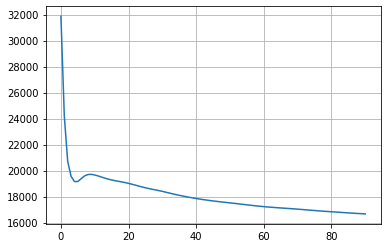

In [6]:
plt.plot(obj[:])
plt.grid(True)

In [7]:
%%time
tv = TotalVariation(lambd = lambd, saturation = True, extended_output = False, max_iter = 1000, coef = coef)
smoothed[:,:,1], _ = tv.transform(img[:,:,1])
smoothed[:,:,2], _ = tv.transform(img[:,:,2])

 12%|█▏        | 117/1000 [00:04<00:42, 21.00it/s]

CPU times: user 14.4 s, sys: 3.38 s, total: 17.7 s
Wall time: 9.04 s


result

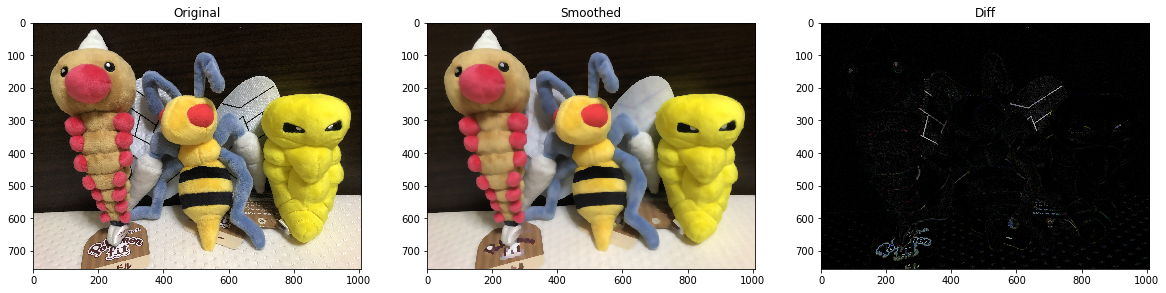

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.grid(False)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(smoothed)
plt.grid(False)
plt.title('Smoothed')
plt.subplot(1,3,3)
plt.imshow(np.abs(img - smoothed))
plt.grid(False)
plt.title('Diff')
plt.savefig('smoothed_insects.png')
plt.show()

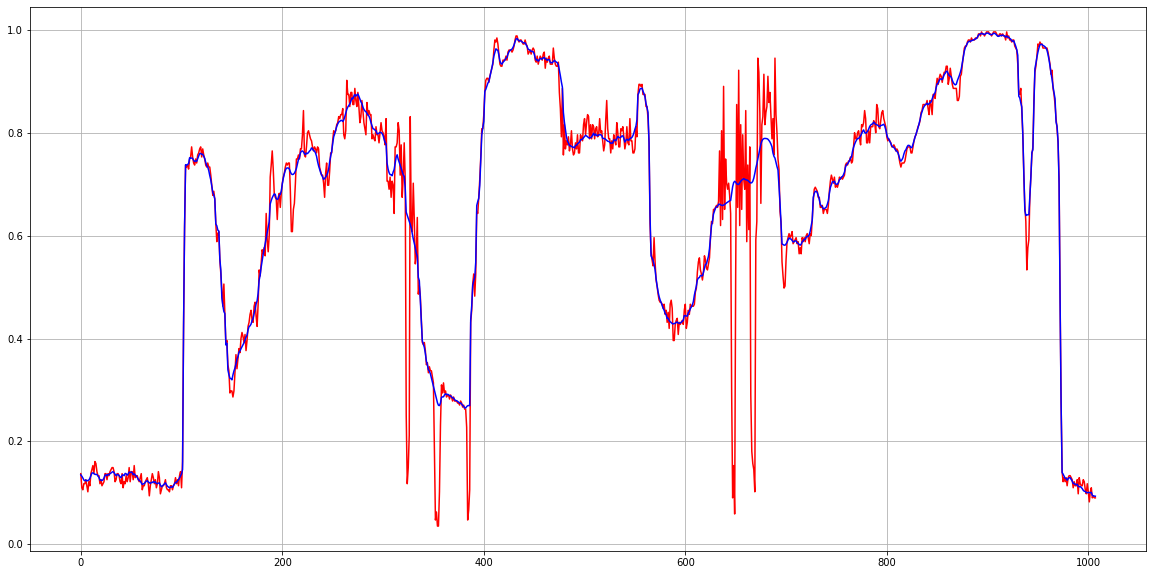

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(img[:,:,0][300], 'r')
plt.plot(smoothed[:,:,0][300], 'b')
plt.grid()